## Scenarios 1-4: Wastewater Signal Correlations

This code investigates how the aggregated wastewater signal is affected by each sampling regime modification.

Importing the necessary libraries below:

In [1]:
%%capture
!pip install folium;
import folium
from folium.plugins import MarkerCluster
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
!pip install numpy 
import numpy as np
import seaborn as sns
from scipy.stats import trim_mean
from scipy.stats import spearmanr
import matplotlib.dates as mdates
import math

The Census blocks in California were uploaded and filtered to obtain only the blocks in Yolo County.

In [2]:
ca_blocks = gpd.read_file("/Users/amitamuralidharan/Desktop/wbe_files/tl_2020_06_tabblock20") #Insert file here with the correct directory.
ca_blocks["GEOID20"] = ca_blocks.GEOID20.str.lstrip("0")
yolo_blocks = ca_blocks[ca_blocks["COUNTYFP20"]=="113"]
yolo_blocks = yolo_blocks.rename(columns={"GEOID20":"GEOID"})
yolo_blocks.head(2)

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry
2,06,113,010103,2011,61130101032011,Block 2011,G5040,U,77068,U,S,152151,0,+38.5874284,-121.5303753,0,0,"POLYGON ((-121.53676 38.58855, -121.53421 38.5..."
3,06,113,011500,1002,61130115001002,Block 1002,G5040,R,NaN,NaN,S,2750738,0,+38.8853304,-122.2439514,18,25,"POLYGON ((-122.25881 38.90023, -122.25799 38.8..."


In [3]:
#SUBREGIONAL ZONES
#SR-G, M16-011
SR_G_cb = ['61130105053001','61130105053007','61130105053008','61130105053010','61130105053004','61130105053011','61130105053009',
                               '61130105053002','61130105053005','61130105053006','61130105053003','61130105054001','61130105054000', '61130106092011',
                               '61130106092006','61130106092005','61130106092015','61130106092004','61130106092010','61130106092009','61130106092003',
                               '61130106092000','61130106091002','61130106091005','61130106091004','61130106091001',
                               '61130106102001','61130106091000','61130106102002','61130106102003','61130106102000','61130106092001','61130106092002','61130106091003',
                               '61130106102001']

#SR-A, N10-004
SR_A_cb = ['61130105052025','61130105051017','61130105051018','61130105081000','61130105081003','61130105081004','61130105081001',
                     '61130105081007','61130105081006','61130105112003','61130105121000','61130105121008','61130105121001','61130105112001',
                     '61130105112002','61130105121007','61130105121003','61130105121005','61130105122000','61130105112004','61130105111000',
                     '61130105111002','61130105111003','61130105111005','61130105111001','61130105082002','61130105082004','61130105082005',
                     '61130105082009','61130105082008','61130105082007','61130105132003','61130105132002','61130105081005','61130105082003',
                     '61130105081008','61130105132000','61130105131000','61130105131001','61130105122011','61130105122010','61130105122013',
                     '61130105122006','61130105122007','61130105122004','61130105121004''61130105121006','61130105121004','61130105122005',
                     '61130105122012','61130105122009','61130105122008','61130105082006','61130105112000','61130105082001','61130105052027',
                     '61130105081002','61130105111004','61130105132001','61130105121006','61130105122003','61130105122001','61130105122002','61130105121002']

#SR-B1, N11-062
SR_B_1_cb = ['61130105101004','61130105102000','61130105103004']

#SR-B2, N11-072
SR_B_2_cb = ['61130105102000','61130105102003','61130105102004','61130105102002','61130105102001','61130105103005','61130105091003',
                    '61130105091000','61130105091004','61130105091005']

#SR-B3, N12-066
SR_B_3_cb = ['61130105102000','61130105101004','61130105101006','61130105101005','61130105104002','61130105104001','61130105104003',
                    '61130105091000','61130105091005','61130105091002','61130105091001','61130105092002','61130105092004','61130105092006',
                    '61130105092003','61130105092002','61130105092002','61130105092005']

#SR-B4, N13-041
SR_B_4_cb = ['61130105092002','61130105092010','61130105092009','61130105092008','61130105092012','61130105092011']

#SR-D, N14-031
SR_D_cb = ['61130105052036','61130105052038','61130105052040','61130105052045','61130105052050','61130105052048','61130105052044','61130105052046',
              '61130105052041','61130105052043','61130105052049','61130105052037','61130105052047','61130105052042','61130105052039']

#SR-C1, O12-005
SR_C_1_cb = ['61130107031001','61130107031003','61130107031004','61130107031002','61130107031000','61130107032000','61130107032001',
                          '61130107032003','61130107032004','61130107033000','61130107032011','61130107032012','61130107032013','61130107032014',
                          '61130107032010','61130107032002','61130107032005','61130107032009','61130107032006','61130107033002','61130107033003',
                          '61130107032015','61130107032016','61130107032007','61130107032006','61130107032008','61130107041001','61130107041002',
                          '61130107041003']

#SR-I, O20-001
SR_I_cb = ['61130104012000','61130104012003','61130104012004','61130104012001','61130104012005','61130104012002','61130104014011',
                            '61130104013000','61130104013001','61130104013006','61130104013007','61130104013008','61130104013005','61130104013009',
                            '61130104014036','61130104014034','61130104014035','61130106071010','61130106074001','61130106071009','61130106074002',
                            '61130106071007','61130106071008','61130106072000','61130106072001','61130106074000','61130106074005','61130106074006',
                            '61130106073000','61130106073001','61130106073002','61130106073011','61130106073003','61130106073004','61130106072003',
                            '61130106072002','61130106072004','61130106074007','61130106074003','61130106081002','61130106083000','61130106081004',
                            '61130106083001','61130106083002','61130106081003','61130106081005','61130106081009','61130106081008','61130106081007',
                            '61130106081006','61130106082002','61130106082000','61130106083004','61130106083003','61130106083005','61130106083006',
                            '61130106082001']

#SR-C2, O13-002
SR_C_2_cb = ['61130107033000','61130107033002','61130107033003','61130107032015','61130107032016','61130107032007','61130107032006','61130107032008',
                    '61130107033001','61130107034003','61130107034002','61130107034004','61130107034000','61130107033006','61130107033005','61130107033001',
                    '61130107033000','61130107041009','61130107041018','61130107041019','61130107041012','61130107041013','61130107041017','61130107041016',
                    '61130107041021','61130107041020','61130107041014','61130107041015','61130107011013','61130107011016','61130107011005','61130107011004',
                    '61130107011007','61130107011008','61130107011006','61130107011012','61130107011009','61130107011010','61130107011011','61130107012003',
                    '61130107012004','61130107012000','61130107012008','61130107012007','61130107012005','61130107012006','61130107012002','61130107012001',
                    '61130107012011','61130107012010','61130107012009','61130107013003','61130107013002','61130107013001','61130107013000','61130107014000',
                    '61130107013019','61130107013004','61130107013005','61130107013006','61130107013007','61130107013008','61130107013009','61130107013010',
                    '61130107013011','61130107013012','61130107013018','61130107013017','61130107013016','61130107013015','61130107013014','61130107013013',
                    '61130107014009','61130107014008','61130107014007','61130107014006','61130107014005','61130107014004','61130107014003','61130107014002',
                    '61130107014001','61130107014010','61130107014011','61130107014012','61130107014013','61130107014014','61130107014015','61130107014016',
                    '61130107014017','61130107014018','61130107014019','61130107014036','61130107014035','61130107014034','61130107014033','61130107014032',
                    '61130107014020','61130107014021','61130107014022','61130107014023','61130107014024','61130107014025','61130107014026','61130107014027',
                    '61130107014028','61130107014029','61130107014030','61130107014031','61130107014038','61130107014039','61130107014037','61130107014040',
                    '61130105012026','61130105012017','61130105012015','61130105012016','61130105012014',
                    '61130106023007','61130106022013','61130106022012','61130106022011','61130106022006','61130106022007',
                    '61130106022014','61130106022015','61130106022010','61130106022009','61130106022008','61130106022016',
                    '61130106022017','61130106022018','61130106024000','61130106102011','61130106102004','61130106102012',
                    '61130106102009','61130106102005','61130106102015','61130106023007','61130106102010','61130106084001',
                    '61130106084003','61130106084002','61130106084004','61130106084011','61130107041006','61130107011003','61130107041011','61130106024001']

#SR-E, O14-020
SR_E_cb = ['61130106025001','61130106021000','61130106025002','61130106025003','61130106025004','61130106025000']

#SR-F1, O14-008
SR_F_1_b = ['61130106022003','61130106022004','61130106022002','61130106022005','61130106022001','61130106022000','61130106111013',
                           '61130106111011','61130106111010','61130106111011','61130106111012','61130106111004','61130106111003','61130106111002',
                           '61130106111001','61130106111005','61130106111000','61130106092012','61130106092013','61130106092014','61130106111008',
                           '61130106111007']

#SR-H, N17-005
SR_H_cb = ['61130106051001','61130106051006','61130106051007','61130106051003','61130106051002','61130106051004','61130106051005','61130106051022',
                     '61130106051008','61130106051010','61130106051011','61130106051012','61130106051014','61130106051009','61130106051013','61130106051015',
                     '61130106051020','61130106051021','61130106051017','61130106051015','61130106051018','61130106051016','61130106052004','61130106052001',
                     '61130106052005','61130106052006','61130106052003','61130106052002','61130106101000','61130106101001','61130106101002','61130106101003',
                     '61130106101008','61130106101009','61130106101006','61130106101007','61130106101005','61130106101011','61130106102006','61130106102008']

#SR-F2, P14-027
SR_F_2_cb = ['61130106023004','61130106023003','61130106023002','61130106023000','61130106023005','61130106023006','61130106023001','61130106111014',
                           '61130106111009','61130106111006','61130106111007']


#SR-C3, P14-102
SR_C_3_cb = ['61130106023007','61130106022013','61130106022012','61130106022011','61130106022006','61130106022007',
                                '61130106022014','61130106022015','61130106022010','61130106022009','61130106022008','61130106022016',
                                '61130106022017','61130106022018','61130106024000','61130106102011','61130106102004','61130106102012',
                                '61130106102009','61130106102005','61130106102015','61130106023007','61130106102010','61130106084001',
                                '61130106084003','61130106084002','61130106084004','61130106084011','61130106024001']

In [4]:
COD_pop = 9223
#G A B B B B D H C C F E I F C 
#proportions of above-65 population
sewershed_zone_pops = [1, 0.143892, 0.185568, 0.204637, 
                          0.204637, 0.204637, 0.204637, 
                          0.105740, 0.136093, 0.100063, 
                          0.100063, 0.110459, 0.101449, 
                          0.146169, 0.110459, 0.100063]

#Above-65 pop
# sewershed_zone_pops = [COD_pop, SR_G_pop, SR_A_pop, SR_B_1_pop, SR_B_2_pop,
#                        SR_B_3_pop, SR_B_4_pop, SR_D_pop, SR_H_pop, 
#                        SR_C_1_pop, SR_C_2_pop, 
#                        SR_F_1_pop, SR_E_pop, SR_I_pop,
#                        SR_F_2_pop, SR_C_3_pop]
sewershed_zone_names = ['COD WWTP','SR-G','SR-A','SR-B1','SR-B2','SR-B3','SR-B4','SR-D',
                        'SR-H','SR-C1','SR-C2','SR-F1','SR-E','SR-I','SR-F2','SR-C3']

sewershed_zones = pd.DataFrame(list(zip(sewershed_zone_names,sewershed_zone_pops)))
sewershed_zones.columns = ["Name","Population"]

In [5]:
#Uploading wastewater data (ddPCR results)
ddpcr_results = pd.read_csv("/Users/amitamuralidharan/Desktop/wbe_files/ddpcr_results.csv") #Insert correct file directory here. 

In [6]:
#Finding the names of all the unique sampling locations
sampling_locations = list(ddpcr_results["Location"].unique())
sampling_locations.remove('8th and J')
sampling_locations.remove('Rancho Yolo: East 8th Street')
sampling_locations.remove('Peregrine School (downstream)')
sampling_locations.remove('Peregrine School (upstream)')
sampling_locations.remove('Arroyo A')
sampling_locations.remove('Arroyo B')
sampling_locations.remove('Rancho Yolo: Pole Line north of 5th')
sampling_locations.remove('Cantrill Drive')
sampling_locations.remove('Olive Drive')

In [7]:
#Calculating the 10-day trimmed right-aligned moving average
moving_averages = []
all_dates = []
raw_data = []
for i in np.arange(len(sampling_locations)):
    
    ddpcr_results_loc = ddpcr_results[ddpcr_results["Location"]==sampling_locations[i]]
    ddpcr_results_loc = ddpcr_results_loc[["SampleDate","N/PMMoV"]]
    ddpcr_results_loc = ddpcr_results_loc.rename(columns={"N/PMMoV":"NormConc"})
    #changing to float
    ddpcr_results_loc["NormConc"] = pd.to_numeric(ddpcr_results_loc.NormConc, errors='coerce')
    x = ddpcr_results_loc["SampleDate"]
    x_split = x.str.split()
    dates = x_split.str[0]
    dates = pd.to_datetime(pd.Series(dates), format='%Y-%m-%d')
    all_dates.append(dates.tolist())
    y = ddpcr_results_loc["NormConc"]
   
    #10-day moving average
    #ma = y.rolling(10).mean()
    #ma = y.rolling(10,center=True).apply(lambda x: trim_mean(x, 0.1))
    ma = y.rolling(10).apply(lambda x: trim_mean(x, 0.1))
    moving_averages.append(ma.tolist())
    
    raw_data.append(y.tolist())

In [8]:
#Want to change nan values to zero
nan = float('nan')
moving_averages = [[0 if math.isnan(i) else i for i in j] for j in moving_averages]

sewershed_zones["Sample Dates"] = all_dates
sewershed_zones["Moving Average"] = moving_averages
sewershed_zones["Raw Data"] = raw_data

all_pma = []
for i in np.arange(len(moving_averages)):
    pma = pd.Series(moving_averages[i])*sewershed_zone_pops[i]
    all_pma.append(pma.tolist())

sewershed_zones["Population-Weighted Moving Average"] = all_pma

In [9]:
#changing to float
#ddpcr_results_loc["NormConc"] = pd.to_numeric(ddpcr_results_loc.NormConc, errors='coerce')
COD_WWTP_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][0]), format='%Y-%m-%d')
COD_WWTP_ma = sewershed_zones["Moving Average"][0]
CumuMA_COD_WWTP = pd.DataFrame(list(zip(COD_WWTP_dates,COD_WWTP_ma)))
CumuMA_COD_WWTP.columns = ["Sample Date","MA"]

COD_WWTP_pma = sewershed_zones["Population-Weighted Moving Average"][0]
CumuPMA_COD_WWTP = pd.DataFrame(list(zip(COD_WWTP_dates,COD_WWTP_pma)))
CumuPMA_COD_WWTP.columns = ["Sample Date","PMA"]

SR_G_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][1]), format='%Y-%m-%d')
SR_G_pma = sewershed_zones["Population-Weighted Moving Average"][1]
CumuPMA_SR_G = pd.DataFrame(list(zip(SR_G_dates,SR_G_pma)))
CumuPMA_SR_G.columns = ["Sample Date","PMA"]

SR_A_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][2]), format='%Y-%m-%d')
SR_A_pma = sewershed_zones["Population-Weighted Moving Average"][2]
CumuPMA_SR_A = pd.DataFrame(list(zip(SR_A_dates,SR_A_pma)))
CumuPMA_SR_A.columns = ["Sample Date","PMA"]

SR_B_1_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][3]), format='%Y-%m-%d')
SR_B_1_pma = sewershed_zones["Population-Weighted Moving Average"][3]
CumuPMA_SR_B_1 = pd.DataFrame(list(zip(SR_B_1_dates,SR_B_1_pma)))
CumuPMA_SR_B_1.columns = ["Sample Date","PMA"]

SR_B_2_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][4]), format='%Y-%m-%d')
SR_B_2_pma = sewershed_zones["Population-Weighted Moving Average"][4]
CumuPMA_SR_B_2 = pd.DataFrame(list(zip(SR_B_2_dates,SR_B_2_pma)))
CumuPMA_SR_B_2.columns = ["Sample Date","PMA"]

SR_B_3_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][5]), format='%Y-%m-%d')
SR_B_3_pma = sewershed_zones["Population-Weighted Moving Average"][5]
CumuPMA_SR_B_3 = pd.DataFrame(list(zip(SR_B_3_dates,SR_B_3_pma)))
CumuPMA_SR_B_3.columns = ["Sample Date","PMA"]

SR_B_4_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][6]), format='%Y-%m-%d')
SR_B_4_pma = sewershed_zones["Population-Weighted Moving Average"][6]
CumuPMA_SR_B_4 = pd.DataFrame(list(zip(SR_B_4_dates,SR_B_4_pma)))
CumuPMA_SR_B_4.columns = ["Sample Date","PMA"]

SR_D_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][7]), format='%Y-%m-%d')
SR_D_pma = sewershed_zones["Population-Weighted Moving Average"][7]
CumuPMA_SR_D = pd.DataFrame(list(zip(SR_D_dates,SR_D_pma)))
CumuPMA_SR_D.columns = ["Sample Date","PMA"]

SR_H_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][8]), format='%Y-%m-%d')
SR_H_pma = sewershed_zones["Population-Weighted Moving Average"][8]
CumuPMA_SR_H = pd.DataFrame(list(zip(SR_H_dates,SR_H_pma)))
CumuPMA_SR_H.columns = ["Sample Date","PMA"]

SR_C_1_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][9]), format='%Y-%m-%d')
SR_C_1_pma = sewershed_zones["Population-Weighted Moving Average"][9]
CumuPMA_SR_C_1 = pd.DataFrame(list(zip(SR_C_1_dates,SR_C_1_pma)))
CumuPMA_SR_C_1.columns = ["Sample Date","PMA"]

SR_C_2_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][10]), format='%Y-%m-%d')
SR_C_2_pma = sewershed_zones["Population-Weighted Moving Average"][10]
CumuPMA_SR_C_2 = pd.DataFrame(list(zip(SR_C_2_dates,SR_C_2_pma)))
CumuPMA_SR_C_2.columns = ["Sample Date","PMA"]

SR_F_1_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][11]), format='%Y-%m-%d')
SR_F_1_pma = sewershed_zones["Population-Weighted Moving Average"][11]
CumuPMA_SR_F_1 = pd.DataFrame(list(zip(SR_F_1_dates,SR_F_1_pma)))
CumuPMA_SR_F_1.columns = ["Sample Date","PMA"]

SR_E_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][12]), format='%Y-%m-%d')
SR_E_pma = sewershed_zones["Population-Weighted Moving Average"][12]
CumuPMA_SR_E = pd.DataFrame(list(zip(SR_E_dates,SR_E_pma)))
CumuPMA_SR_E.columns = ["Sample Date","PMA"]

SR_I_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][13]), format='%Y-%m-%d')
SR_I_pma = sewershed_zones["Population-Weighted Moving Average"][13]
CumuPMA_SR_I = pd.DataFrame(list(zip(SR_I_dates,SR_I_pma)))
CumuPMA_SR_I.columns = ["Sample Date","PMA"]

SR_F_2_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][14]), format='%Y-%m-%d')
SR_F_2_pma = sewershed_zones["Population-Weighted Moving Average"][14]
CumuPMA_SR_F_2 = pd.DataFrame(list(zip(SR_F_2_dates,SR_F_2_pma)))
CumuPMA_SR_F_2.columns = ["Sample Date","PMA"]

SR_C_3_dates = pd.to_datetime(pd.Series(sewershed_zones["Sample Dates"][15]), format='%Y-%m-%d')
SR_C_3_pma = sewershed_zones["Population-Weighted Moving Average"][15]
CumuPMA_SR_C_3 = pd.DataFrame(list(zip(SR_C_3_dates,SR_C_3_pma)))
CumuPMA_SR_C_3.columns = ["Sample Date","PMA"]

In [10]:
#Filtering for all points with shared x-values, didn't include Rancho Yolo/Research Park because the entire zone is overlapped
shared_x = sorted(list(set.intersection(*map(set, [SR_G_dates, SR_A_dates,SR_B_1_dates,
                                           SR_B_2_dates,SR_B_3_dates,SR_B_4_dates,SR_D_dates,
                                           SR_H_dates,SR_C_1_dates,SR_C_2_dates,
                                           SR_F_1_dates,SR_E_dates,SR_I_dates,
                                           SR_F_2_dates,COD_WWTP_dates]))))

shared_x = pd.to_datetime(pd.Series(shared_x), format='%Y-%m-%d')

FilteredPMA_SR_G = CumuPMA_SR_G[CumuPMA_SR_G['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_A = CumuPMA_SR_A[CumuPMA_SR_A['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_B_1 = CumuPMA_SR_B_1[CumuPMA_SR_B_1['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_B_2 = CumuPMA_SR_B_2[CumuPMA_SR_B_2['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_B_3 = CumuPMA_SR_B_3[CumuPMA_SR_B_3['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_B_4 = CumuPMA_SR_B_4[CumuPMA_SR_B_4['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_D = CumuPMA_SR_D[CumuPMA_SR_D['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_H = CumuPMA_SR_H[CumuPMA_SR_H['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_C_1 = CumuPMA_SR_C_1[CumuPMA_SR_C_1['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_C_2 = CumuPMA_SR_C_2[CumuPMA_SR_C_2['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_F_1 = CumuPMA_SR_F_1[CumuPMA_SR_F_1['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_E = CumuPMA_SR_E[CumuPMA_SR_E['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_I = CumuPMA_SR_I[CumuPMA_SR_I['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]
FilteredPMA_SR_F_2 = CumuPMA_SR_F_2[CumuPMA_SR_F_2['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]


FilteredMA_COD_WWTP = CumuMA_COD_WWTP[CumuMA_COD_WWTP['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["MA"]
FilteredPMA_COD_WWTP = CumuPMA_COD_WWTP[CumuPMA_COD_WWTP['Sample Date'].isin(shared_x)].drop_duplicates(subset=['Sample Date'])["PMA"]

### Scenario 1: Baseline minus 25% of sites (randomly selected)

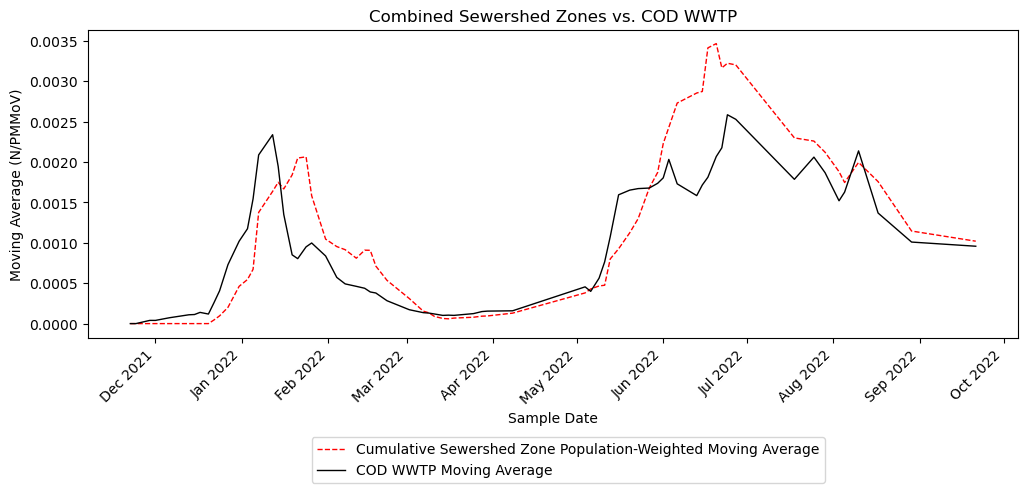

SpearmanrResult(correlation=0.9071916842696998, pvalue=1.1947844407545058e-27)

In [11]:
#Create a dataframe with all the values, then sum them, have two columns: cumulative and COD WWTP
filtered_pmas = [FilteredPMA_SR_G,FilteredPMA_SR_B_1,FilteredPMA_SR_B_2,FilteredPMA_SR_B_3,FilteredPMA_SR_B_4,
                 FilteredPMA_SR_H,FilteredPMA_SR_C_1,FilteredPMA_SR_C_2, FilteredPMA_SR_E,FilteredPMA_SR_I]

cumu_pma = [sum(x) for x in zip(*filtered_pmas)]

cod_comparison = pd.DataFrame(list(zip(cumu_pma,FilteredMA_COD_WWTP)))
cod_comparison.columns = ["Cumulative Population-Weighted Moving Average","COD WWTP Moving Average"]


#plotting comparison summary
plt.figure(figsize=(12,4))
plt.plot(shared_x,cumu_pma,c="red",linewidth=1,linestyle='dashed',label="Cumulative Sewershed Zone Population-Weighted Moving Average")
plt.plot(shared_x,FilteredMA_COD_WWTP,c="black",linewidth=1,label="COD WWTP Moving Average")

#formatting
plt.title("Combined Sewershed Zones vs. COD WWTP")
plt.xlabel("Sample Date")
plt.ylabel("Moving Average (N/PMMoV)")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(0.8,-0.3))
plt.show()

corr_overall = spearmanr(cumu_pma, FilteredMA_COD_WWTP)
corr_overall

### Scenario 2: Baseline minus 25% of sites (prioritized to maximize coverage of >65-year-old population)

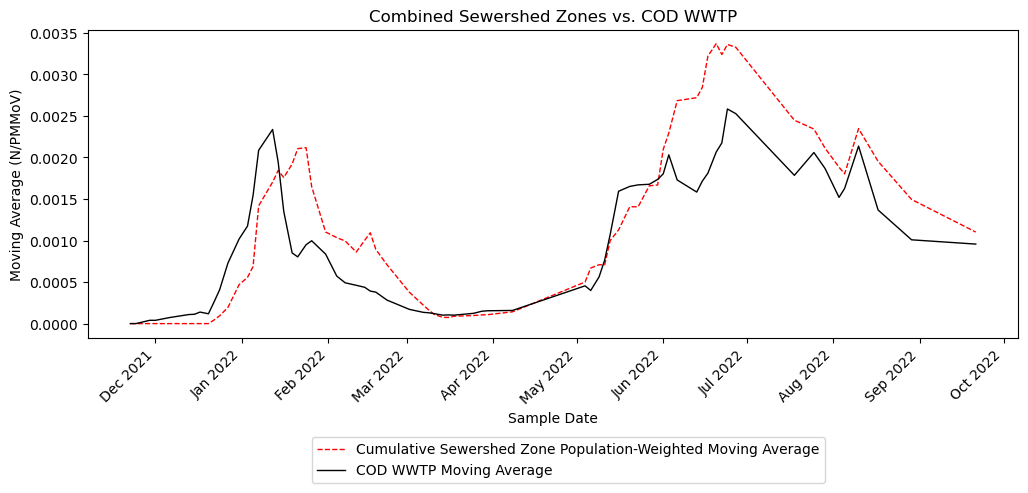

SpearmanrResult(correlation=0.9004779622769545, pvalue=1.1858661898771319e-26)

In [12]:
#Create a dataframe with all the values, then sum them, have two columns: cumulative and COD WWTP
filtered_pmas = [FilteredPMA_SR_G,FilteredPMA_SR_A,FilteredPMA_SR_B_1,FilteredPMA_SR_B_2,FilteredPMA_SR_B_3,FilteredPMA_SR_B_4,FilteredPMA_SR_H,FilteredPMA_SR_C_1,FilteredPMA_SR_C_2,FilteredPMA_SR_I,]

cumu_pma = [sum(x) for x in zip(*filtered_pmas)]

cod_comparison = pd.DataFrame(list(zip(cumu_pma,FilteredMA_COD_WWTP)))
cod_comparison.columns = ["Cumulative Population-Weighted Moving Average","COD WWTP Moving Average"]

#plotting comparison summary
plt.figure(figsize=(12,4))
plt.plot(shared_x,cumu_pma,c="red",linewidth=1,linestyle='dashed',label="Cumulative Sewershed Zone Population-Weighted Moving Average")
plt.plot(shared_x,FilteredMA_COD_WWTP,c="black",linewidth=1,label="COD WWTP Moving Average")

#formatting
plt.title("Combined Sewershed Zones vs. COD WWTP")
plt.xlabel("Sample Date")
plt.ylabel("Moving Average (N/PMMoV)")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(0.8,-0.3))
plt.show()

corr_overall = spearmanr(cumu_pma, FilteredMA_COD_WWTP)
corr_overall

### Scenario 3: Baseline minus 50% of sites (randomly selected)

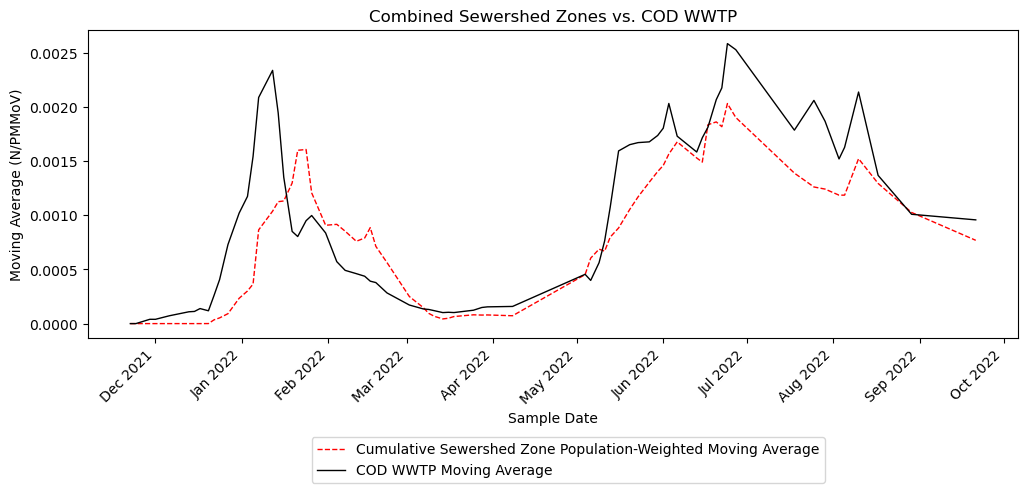

SpearmanrResult(correlation=0.8752382674831977, pvalue=1.871641251287106e-23)

In [13]:
#Create a dataframe with all the values, then sum them, have two columns: cumulative and COD WWTP
filtered_pmas = [FilteredPMA_SR_G,FilteredPMA_SR_A,
                 FilteredPMA_SR_D,FilteredPMA_SR_C_1,FilteredPMA_SR_C_2, FilteredPMA_SR_F_1,FilteredPMA_SR_E,
                 FilteredPMA_SR_F_2]

cumu_pma = [sum(x) for x in zip(*filtered_pmas)]

cod_comparison = pd.DataFrame(list(zip(cumu_pma,FilteredMA_COD_WWTP)))
cod_comparison.columns = ["Cumulative Population-Weighted Moving Average","COD WWTP Moving Average"]

#plotting comparison summary
plt.figure(figsize=(12,4))
plt.plot(shared_x,cumu_pma,c="red",linewidth=1,linestyle='dashed',label="Cumulative Sewershed Zone Population-Weighted Moving Average")
plt.plot(shared_x,FilteredMA_COD_WWTP,c="black",linewidth=1,label="COD WWTP Moving Average")

#formatting
plt.title("Combined Sewershed Zones vs. COD WWTP")
plt.xlabel("Sample Date")
plt.ylabel("Moving Average (N/PMMoV)")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(0.8,-0.3))
plt.show()

corr_overall = spearmanr(cumu_pma, FilteredMA_COD_WWTP)
corr_overall

### Scenario 4: Baseline minus 50% of sites (prioritized to maximize coverage of >65-year-old population)

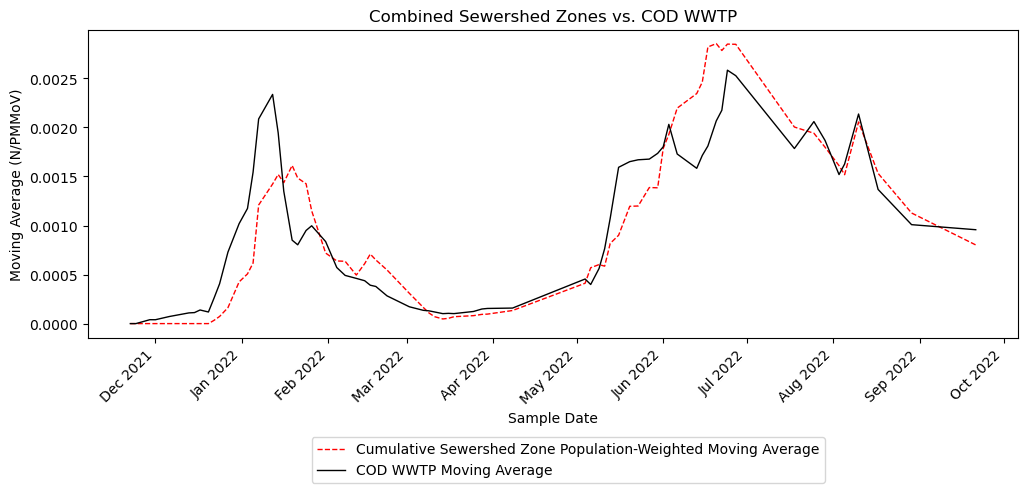

SpearmanrResult(correlation=0.9171279928189628, pvalue=2.843795664784126e-29)

In [14]:
#Create a dataframe with all the values, then sum them, have two columns: cumulative and COD WWTP
filtered_pmas = [FilteredPMA_SR_A,FilteredPMA_SR_B_1,FilteredPMA_SR_B_2,FilteredPMA_SR_B_3,FilteredPMA_SR_B_4,FilteredPMA_SR_C_1,FilteredPMA_SR_C_2,FilteredPMA_SR_I,]

cumu_pma = [sum(x) for x in zip(*filtered_pmas)]

cod_comparison = pd.DataFrame(list(zip(cumu_pma,FilteredMA_COD_WWTP)))
cod_comparison.columns = ["Cumulative Population-Weighted Moving Average","COD WWTP Moving Average"]

#plotting comparison summary
plt.figure(figsize=(12,4))
plt.plot(shared_x,cumu_pma,c="red",linewidth=1,linestyle='dashed',label="Cumulative Sewershed Zone Population-Weighted Moving Average")
plt.plot(shared_x,FilteredMA_COD_WWTP,c="black",linewidth=1,label="COD WWTP Moving Average")

#formatting
plt.title("Combined Sewershed Zones vs. COD WWTP")
plt.xlabel("Sample Date")
plt.ylabel("Moving Average (N/PMMoV)")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(0.8,-0.3))
plt.show()

corr_overall = spearmanr(cumu_pma, FilteredMA_COD_WWTP)
corr_overall